# LangChain and Google's Gemini

In [1]:
pip install --upgrade -q langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [2]:
# In una cella Jupyter o in uno script Python
try:
    import langchain_google_genai
    print("Il pacchetto è installato.")
except ImportError:
    print("Il pacchetto non è installato.")

Il pacchetto è installato.


In [3]:
pip show langchain-google-genai

Name: langchain-google-genai
Version: 2.1.2
Summary: An integration package connecting Google's genai package and LangChain
Home-page: https://github.com/langchain-ai/langchain-google
Author: 
Author-email: 
License: MIT
Location: /Users/pandagan/workspace/projects/ztm_llm_langchain/corso_langchain/lib/python3.13/site-packages
Requires: filetype, google-ai-generativelanguage, langchain-core, pydantic
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade google-generativeai

Note: you may need to restart the kernel to use updated packages.


In [7]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

True

In [9]:
import getpass
import os

if 'GOOGLE_API_KEY' not in os.environ:
    os.environ['GOOGLE_API_KEY'] = getpass('Provide your Google API Key: ')

In [10]:
import google.generativeai as genai
for model in genai.list_models():
    print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.5-pro-exp-03-25
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking

## Integrating Gemini With LangChain 

In [36]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash', temperature=0.9)

response = llm.invoke('Write a paragraph about life on Mars in year 2100')

print(response.content)

By 2100, life on Mars is a carefully orchestrated dance between humanity and a still-challenging environment. Thriving, albeit enclosed, cities nestled in the Valles Marineris and around Olympus Mons hum with the rhythmic hum of life support systems and the chatter of a globalized Martian society. Biodomes flourish, providing fresh produce and a splash of terrestrial green against the rusty landscape, while 3D-printed habitats extend deeper into the Martian crust. Generations born under the red sky consider Mars home, forging a unique Martian identity intertwined with scientific advancement, resourcefulness, and a constant awareness of the delicate balance that sustains their existence. While the dream of a fully terraformed planet remains decades away, life on Mars in 2100 is a testament to human ingenuity and the enduring spirit of exploration.


### Usare un prompts

In [37]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain_core.output_parsers import StrOutputParser


llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

prompt = PromptTemplate.from_template('You are a content creator. Write me a tweet about {topic}')

chain = (prompt
         | llm
        | StrOutputParser()
        ).with_config({"verbose": True})

def format_output(text):
    return {'topic':topic, 'text':text}

chain_with_dict = chain | format_output

topic = 'Why wil AI change the world'

response = chain_with_dict.invoke({'topic':topic})
print(response)

{'topic': 'Why wil AI change the world', 'text': 'Okay, here\'s a tweet draft for you, focusing on the transformative potential of AI:\n\n**Option 1 (Short & impactful):**\n\n> AI isn\'t just a trend, it\'s a revolution. From healthcare to climate change, its potential to solve humanity\'s biggest challenges is HUGE. Get ready for a world fundamentally reshaped. #AI #ArtificialIntelligence #FutureTech #Innovation\n\n**Option 2 (A bit more specific):**\n\n> AI is poised to revolutionize EVERYTHING. Think personalized medicine, smarter cities, and breakthroughs in energy. It\'s not about robots taking over, but about empowering us to build a better future. What excites you most about AI\'s potential? #AI #Innovation #FutureofWork #Technology\n\n**Option 3 (Focus on accessibility):**\n\n> AI used to be sci-fi. Now it\'s becoming accessible. Imagine AI-powered tools boosting creativity, automating tasks, and leveling the playing field. The real change? Empowering *everyone* to achieve more

In [30]:
print(response["topic"]),

print(response["text"])

Why wil AI change the world
AI isn't just a buzzword; it's a revolution.  From personalized medicine & climate change solutions to automating mundane tasks & sparking creative breakthroughs, AI will fundamentally reshape our world, making life easier, healthier, & more efficient. #AI #ArtificialIntelligence #FutureIsNow


## System Prompt and Streaming

In [31]:
from langchain_core.messages import HumanMessage, SystemMessage
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

output = llm.invoke(
    [
        SystemMessage(content='Answer only YES or NO in French'),
        HumanMessage(content='Is cat a mammal?')
    ]
)

output.content

'OUI'

In [38]:
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash', temperature=0)
prompt = 'Write a scientific papaer outlining the mathematical foundation of our univers'

response = llm.invoke(prompt)
print(response.content)

## The Mathematical Foundation of Our Universe: A Synthesis of Current Theories and Open Questions

**Abstract:** This paper explores the hypothesis that the universe is fundamentally mathematical in nature. We examine the mathematical structures underlying current physical theories, including general relativity, quantum mechanics, and the Standard Model of particle physics. We discuss the potential for a unified mathematical framework, such as string theory or loop quantum gravity, to provide a more complete description of the universe. Furthermore, we address the philosophical implications of a mathematical universe and highlight open questions that remain in this pursuit.

**1. Introduction:**

The idea that mathematics is not merely a tool for describing the universe, but rather its very foundation, has resonated with physicists and philosophers for centuries. From Pythagoras's belief in the numerical harmony of the cosmos to Max Tegmark's Mathematical Universe Hypothesis (MUH), th

## Per generare l'output un pezzo alla volta

In [40]:
for chunk in llm.stream(prompt):
    print(chunk.content)
    print('-' * 50)

##
--------------------------------------------------
 The Mathematical Foundation
--------------------------------------------------
 of Our Universe: A Synthesis of Current Theories and Open Questions

**Abstract:** This
--------------------------------------------------
 paper explores the hypothesis that the universe is fundamentally mathematical in nature, examining the mathematical structures
--------------------------------------------------
 that underpin our current understanding of physics. We review the roles of differential geometry in general relativity, quantum mechanics and its reliance on linear algebra and Hilbert spaces, and the potential
--------------------------------------------------
 of string theory and loop quantum gravity to provide a more unified mathematical framework. We also discuss the limitations of current models and highlight open questions regarding the emergence of consciousness
--------------------------------------------------
, the nature of dark

## Multi Modal AI with Gemini

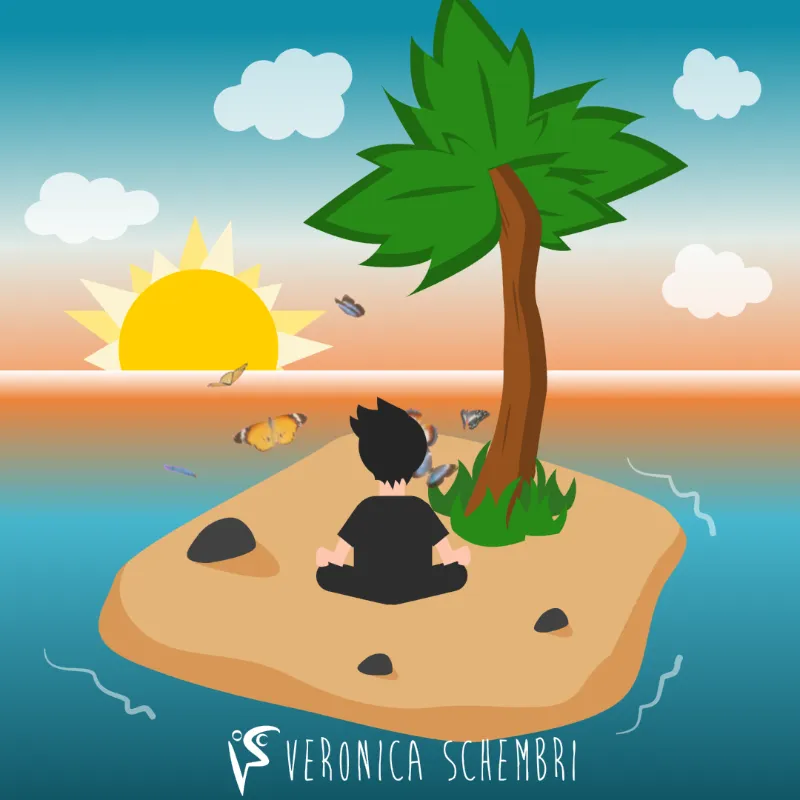

In [41]:
from IPython.display import Image, display
display(Image(filename='Meditazione.webp'))

In [6]:
## Converto img in base64
import base64
def encode_image(image_path):
    with open(image_path, 'rb') as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
byte_image = encode_image('Meditazione.webp')

In [7]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)

llm = ChatGoogleGenerativeAI(model='gemini-1.5-flash', temperature=0.2)
# Gemini 1.5 flash prende come inpunt un img e test, e ritorna un testo come output

prompt= 'What is in this image?'

message = HumanMessage(
    content=[
        {
            'type': 'text',
            'text': prompt
        },
        {
            'type':'image_url',
            'image_url': {'url': f'data:image/jpeg;base64,{byte_image}'}
        }
    ]
)

response = llm.invoke([message])

In [44]:
print(response.content)

That's a digital illustration of a person sitting in a lotus position on a small, sandy island in the middle of the ocean. 


Here's a breakdown of the image:

* **The Person:** A person with dark hair is seated in a meditative pose, facing away from the viewer. They are wearing a dark-colored shirt.

* **The Island:** A small, flat island with a few dark rocks and sparse vegetation. A single palm tree grows in the center.

* **The Ocean:** Calm, blue-green water surrounds the island.

* **The Sky:** A sunset or sunrise scene with a large, bright yellow sun and some fluffy white clouds.

* **Butterflies and Fish:** Several small butterflies and fish are depicted flying/swimming around the island, adding a peaceful and serene atmosphere.

* **Signature:** The artist's signature, "Veronica Schembri," is visible at the bottom.

The overall impression is one of tranquility, solitude, and perhaps spiritual reflection.


In [4]:
def ask_gemini(prompt, image_path, model='gemini-1.5-flash'):
    byte_image = encode_image(image_path)
    llm = ChatGoogleGenerativeAI(model=model)
    message = HumanMessage(
    content=[
        {
            'type': 'text',
            'text': prompt
        },
        {
            'type':'image_url',
            'image_url': {'url': f'data:image/jpeg;base64,{byte_image}'}
        }
        ]
        )
    response = llm.invoke([message])
    return response

In [47]:
response = ask_gemini('What is the character doing?', 'Meditazione.webp')
print(response.content)

The character is sitting in a meditative pose on a small, sandy island.  There is a palm tree on the island, and the character appears to be watching the sunset over the ocean.  Butterflies and small fish are also visible in the image.


In [48]:
response = ask_gemini('How many kinf of butterfly can you identify', 'Meditazione.webp')
print(response.content)

There appear to be at least five different kinds of butterflies in the image.  There may be more, but some are too small or indistinct to identify with certainty.


In [45]:
# creo una richiesta get per recuperare un img
import requests

image_url = 'https://fastly.picsum.photos/id/40/4106/2806.jpg?hmac=MY3ra98ut044LaWPEKwZowgydHZ_rZZUuOHrc3mL5mI'
content = requests.get(image_url).content

# salvo img in locale
with open('online_image.jpg','wb') as file:
    file.write(content)

# mostro img salvata
display(Image(filename='online_image.jpg'))

In [50]:
response = ask_gemini('Describe this image as detailed as possibile', 'online_image.jpg')

print(response.content)

Here's a description of the image:

The image is a close-up, macro shot of a cat's nose and the surrounding fur. 


Here's a breakdown of the details:

* **The Nose:** The nose is the central focus, occupying a significant portion of the frame. It's a pinkish-brown color, with a slightly darker, almost black, area at the very bottom where the nostrils meet. The surface is textured, with numerous tiny pores clearly visible.  The nostrils themselves are not fully in view, hidden partially behind the upper lip.

* **The Fur:** The fur surrounding the nose is predominantly light gray or silver, with darker gray/brown hairs interspersed, giving it a mottled appearance. The hairs are individually visible in the close-up, appearing soft and fine. The fur is slightly out of focus, drawing attention to the sharply focused nose. The fur on the upper part of the nose is darker than the fur on the cheeks.

* **Overall:** The image has a soft, almost dreamy quality due to the shallow depth of field